In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
def n(x):
    return (1.0 - np.exp(-5.0*x)) * 100

In [3]:
def generate_observation(x, noise_std):
    return n(x) + np.random.normal(0, noise_std, size=n(x).shape)

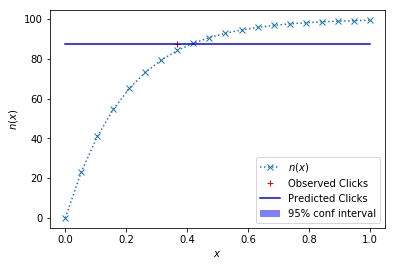

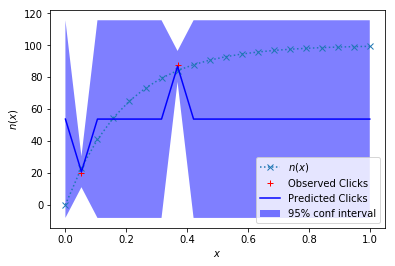

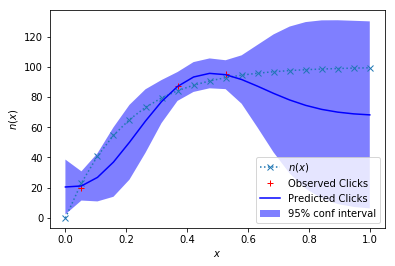

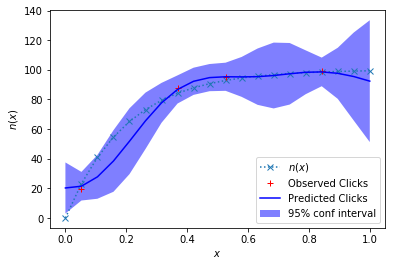

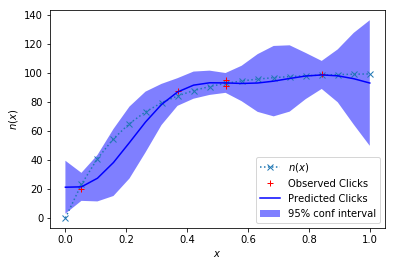

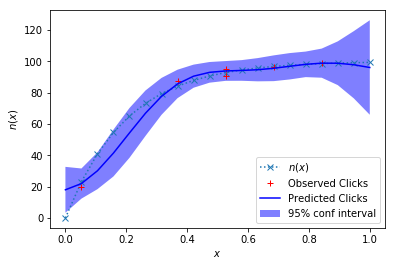

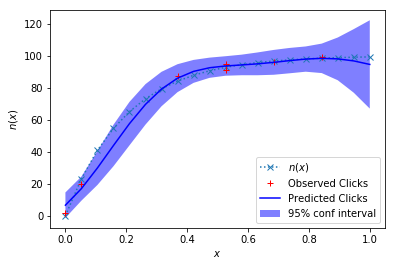

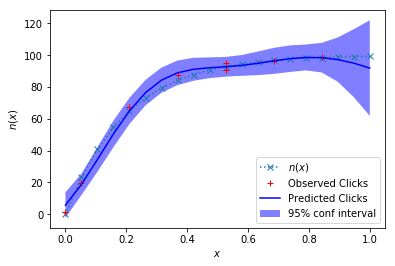

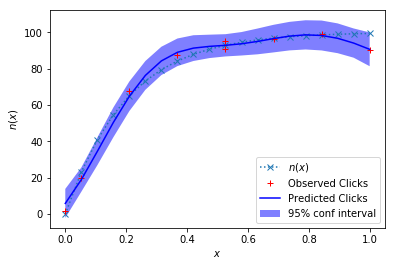

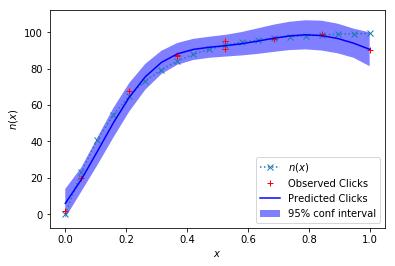

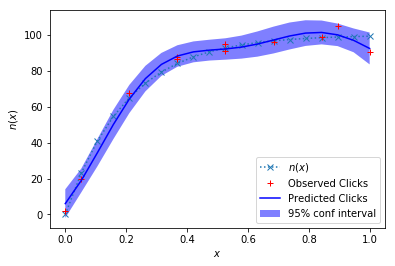

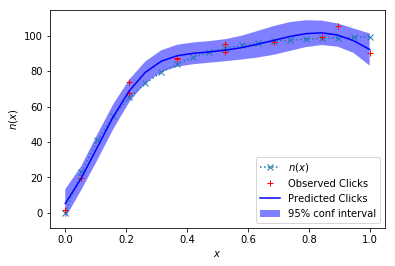

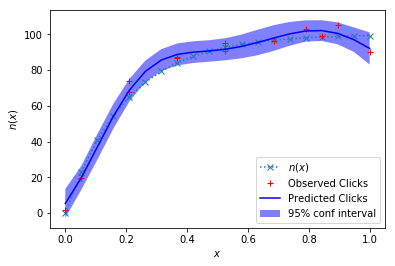

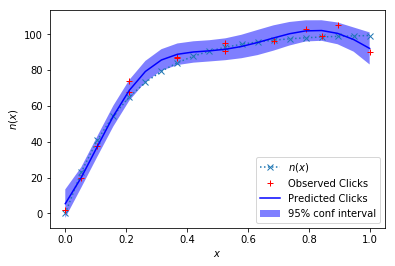

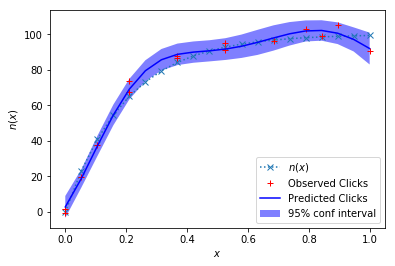

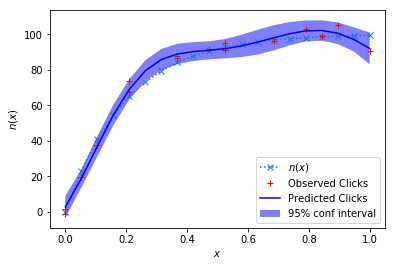

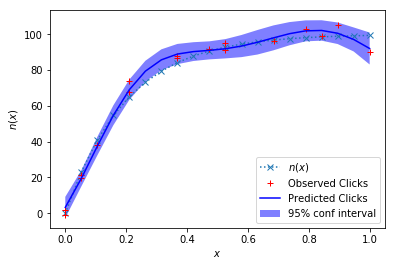

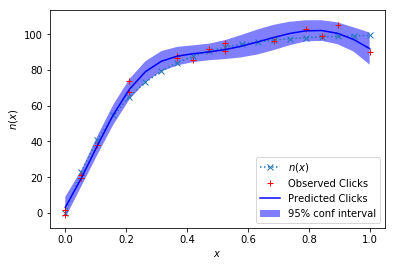

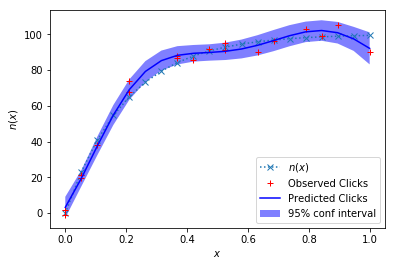

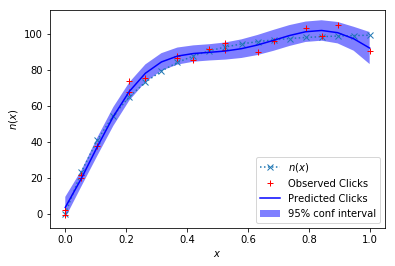

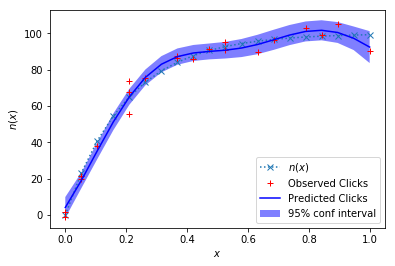

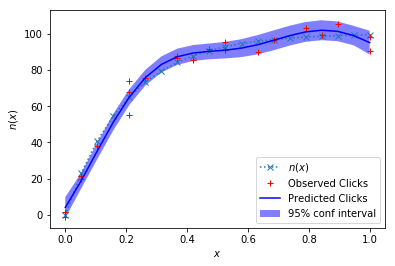

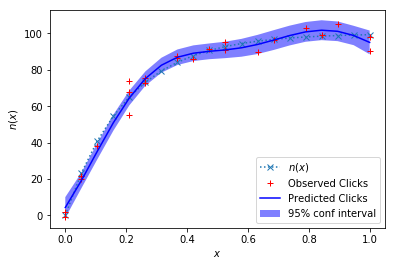

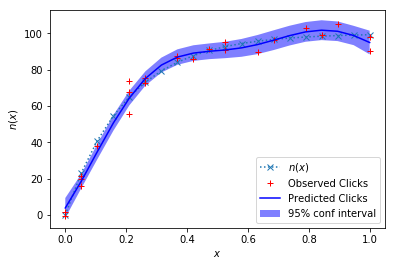

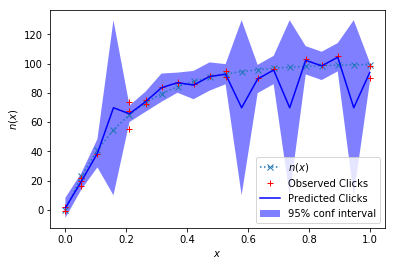

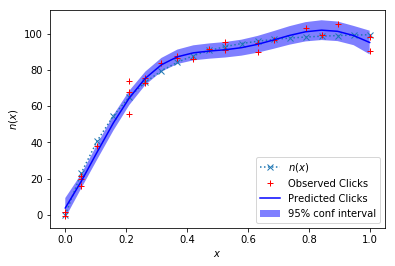

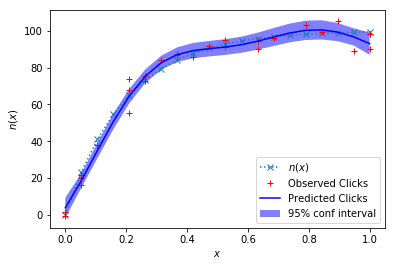

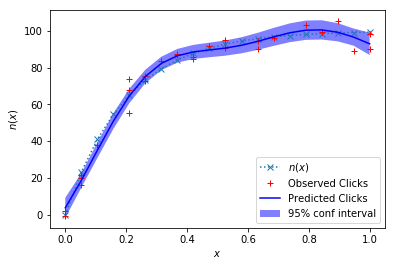

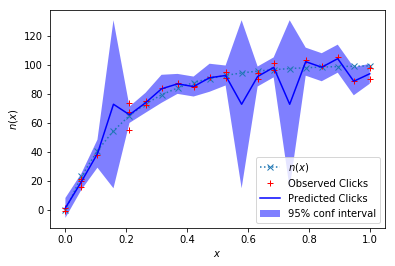

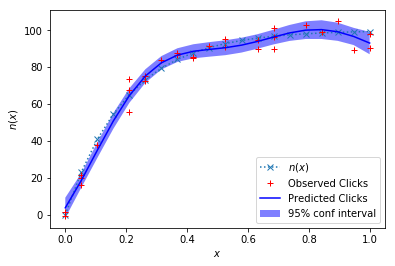

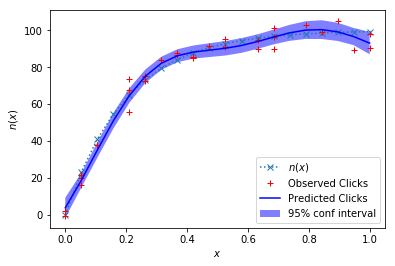

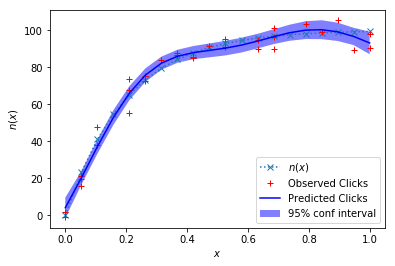

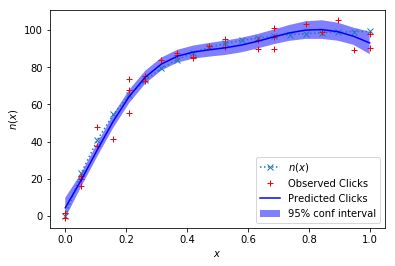

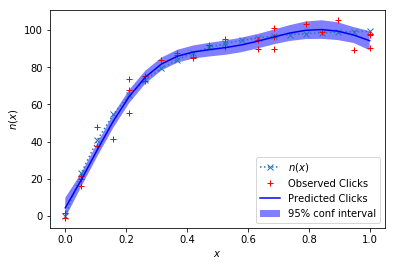

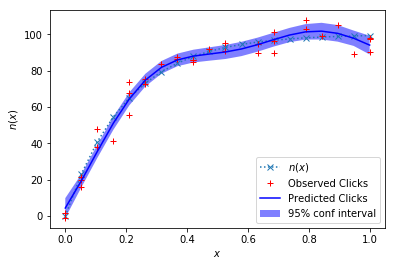

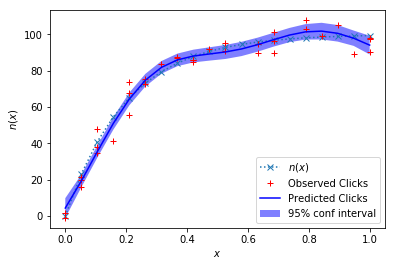

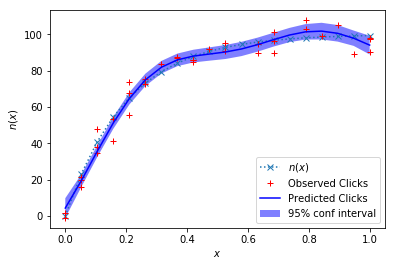

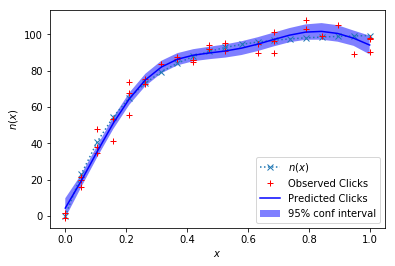

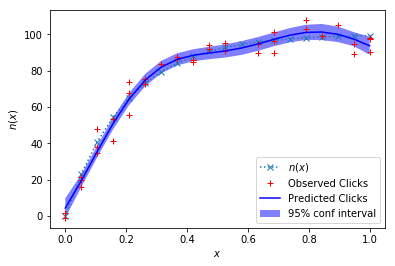

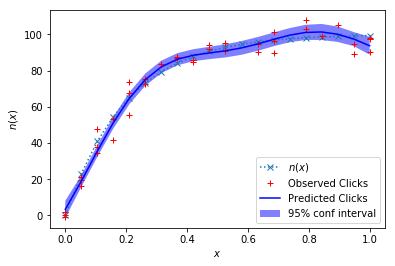

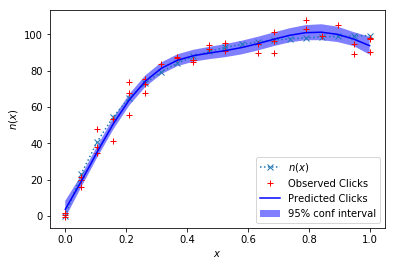

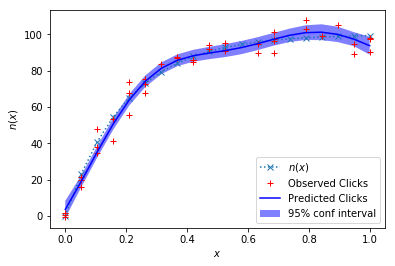

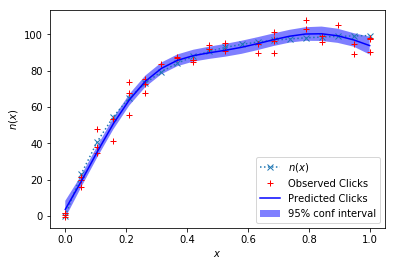

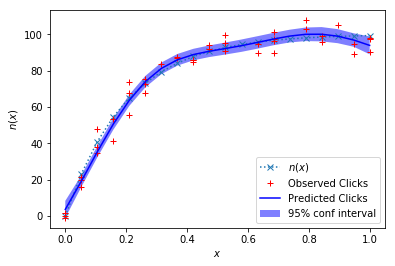

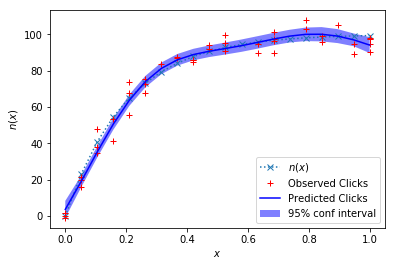

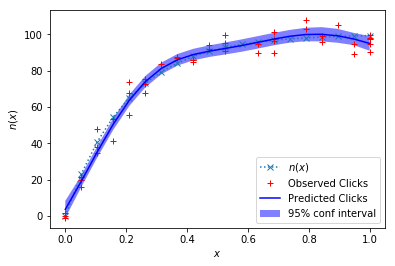

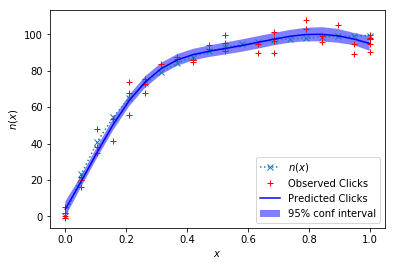

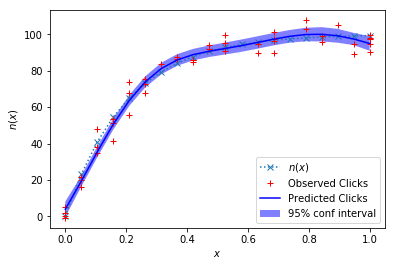

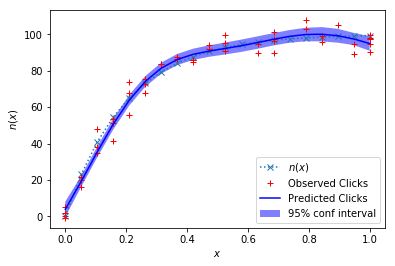

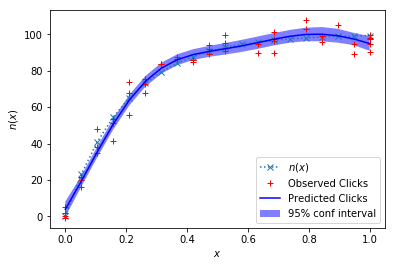

In [4]:
n_obs = 50
bids = np.linspace(0.0, 1.0, 20)

x_obs = np.array([])
y_obs = np.array([])

noise_std = 5.0

for i in range(0, n_obs):
    new_x_obs = np.random.choice(bids, 1)
    new_y_obs = generate_observation(new_x_obs, noise_std)
    
    x_obs = np.append(x_obs, new_x_obs[0])
    y_obs = np.append(y_obs, new_y_obs)
    
    
    X = np.atleast_2d(x_obs).T
    y = y_obs.ravel()
    
    theta = 1.0
    l = 1.0
    
    kernel = C(theta, (1e-3, 1e3)) * RBF(1, (1e-3, 1e3))
    
    gp = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, normalize_y = True, n_restarts_optimizer = 10)
    
    gp.fit(X,y)
    
    x_pred = np.atleast_2d(bids).T
    y_pred, sigma = gp.predict(x_pred, return_std=True)
    
    plt.figure(i)
    plt.plot(x_pred, n(x_pred), 'x:', label=r'$n(x)$')
    plt.plot(X.ravel(), y, 'r+', label='Observed Clicks')
    plt.plot(x_pred, y_pred, 'b-', label='Predicted Clicks')
    plt.fill(
        np.concatenate([x_pred, x_pred[::-1]]), 
        np.concatenate([y_pred - 1.96 * sigma, (y_pred + 1.96*sigma)[::-1]]),
        alpha = 0.5,
        fc='b',
        ec='None',
        label='95% conf interval'
    )
    
    plt.xlabel('$x$')
    plt.ylabel('$n(x)$')
    plt.legend(loc='lower right')
    plt.show()
